In [1]:
import sys
sys.path.insert(0,'..')  # add project root to PATH

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pathlib
import json

In [4]:
from src.preprocessing import JSONUtil, rotate_all_images
from src.annotated_image import AnnotatedImage

In [5]:
# define input and output path for images
input_path = "../data/"
output_path = "../rotations/"

## Rotation 
Loop over all already pre-processed images & rotate by a certain degree

In [6]:
master_json = JSONUtil.read(pathlib.Path(input_path, "Master.json"))

In [7]:
# set rotation angles
# only multiples of 90° are recommended, otherwise the new BB becomes quite big
angles = [45, 90, 180, 270]

In [8]:
rotated_annotations = rotate_all_images(input_path, output_path, master_json, angles)

In [9]:
annotation_output = pathlib.Path(output_path, "Master.json") 
JSONUtil.write(annotation_output, rotated_annotations)

## Check the results

## 2. Check Results
Display the processed images and the bounding boxes to check if the preprocessing was successful.
### Load the images:

In [10]:
images = {image_file.name: AnnotatedImage(image_path=image_file, annotation_path=annotation_output)
          for image_file in pathlib.Path(output_path).glob('*.jpg')}
keys = list(images.keys())
loaded_annotations = JSONUtil.read(annotation_output)

### Select and index/key of the image to check

In [11]:
index = 0
key = keys[index]

### Display the corresponding entry in the JSON annotations

In [12]:
loaded_annotations[key]

{'filename': 'ail_001_kiw_rot_180.jpg',
 'size': 499853,
 'regions': [{'shape_attributes': {'name': 'rect',
    'x': 221,
    'y': 109,
    'width': 47,
    'height': 76},
   'region_attributes': {'Objects': 'Kiwi'}}],
 'file_attributes': {}}

### Display the image with the bounding boxes

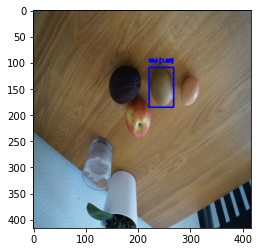

In [13]:
images[key].show()